In [1]:
import math
import numpy as np
#import MDAnalysis as mda
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
q5 = 5
q10 = 10
q20 = 20

In [3]:
# Create the NumPy array x
x = np.linspace(-2, 2, 100)
e5 = q5 * ((x**2 - 1)**2)
e10 = q10 * ((x**2 - 1)**2)
e20 = q20 * ((x**2 - 1)**2)

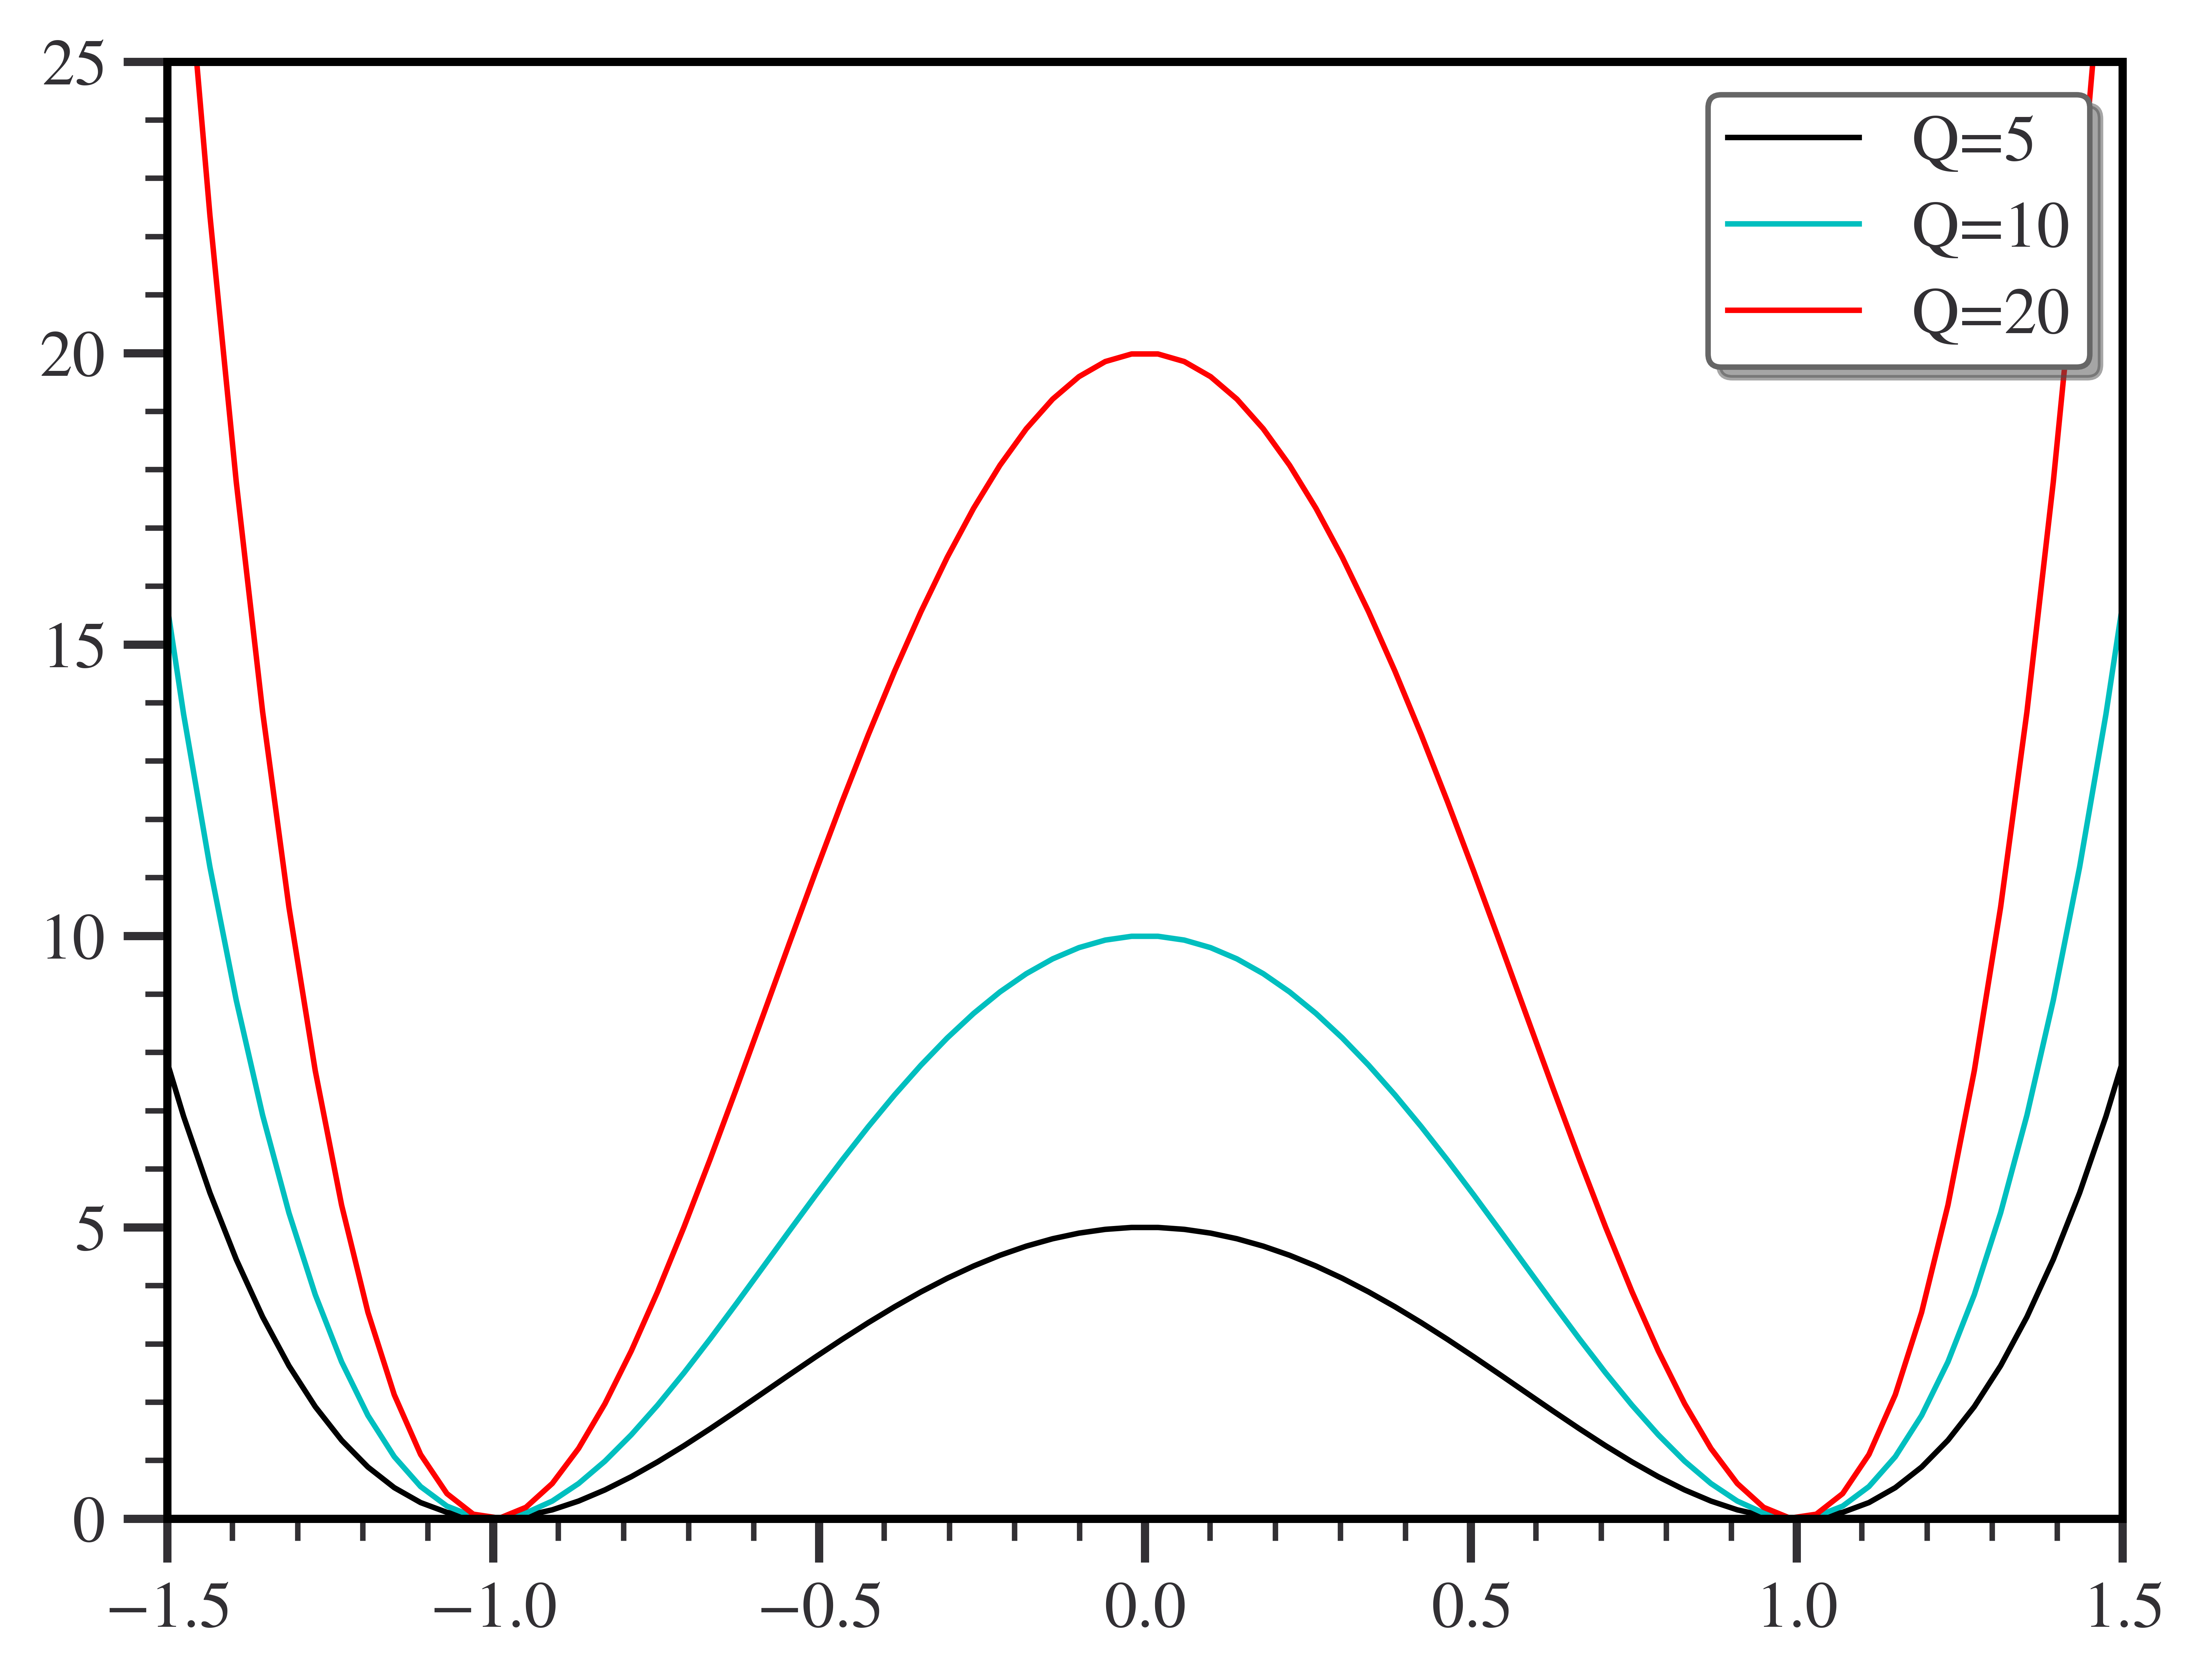

In [4]:
plt.style.use('./style.txt')
plt.plot(x,e5,'k',linewidth=1.0,label='Q=5')
plt.plot(x,e10,'c',linewidth=1.0,label='Q=10')
plt.plot(x,e20,'r',linewidth=1.0,label='Q=20')
plt.ylim(0,25)
plt.xlim(-1.5,1.5)
plt.legend(fancybox=True,borderpad=0.3,shadow=True,loc=1)

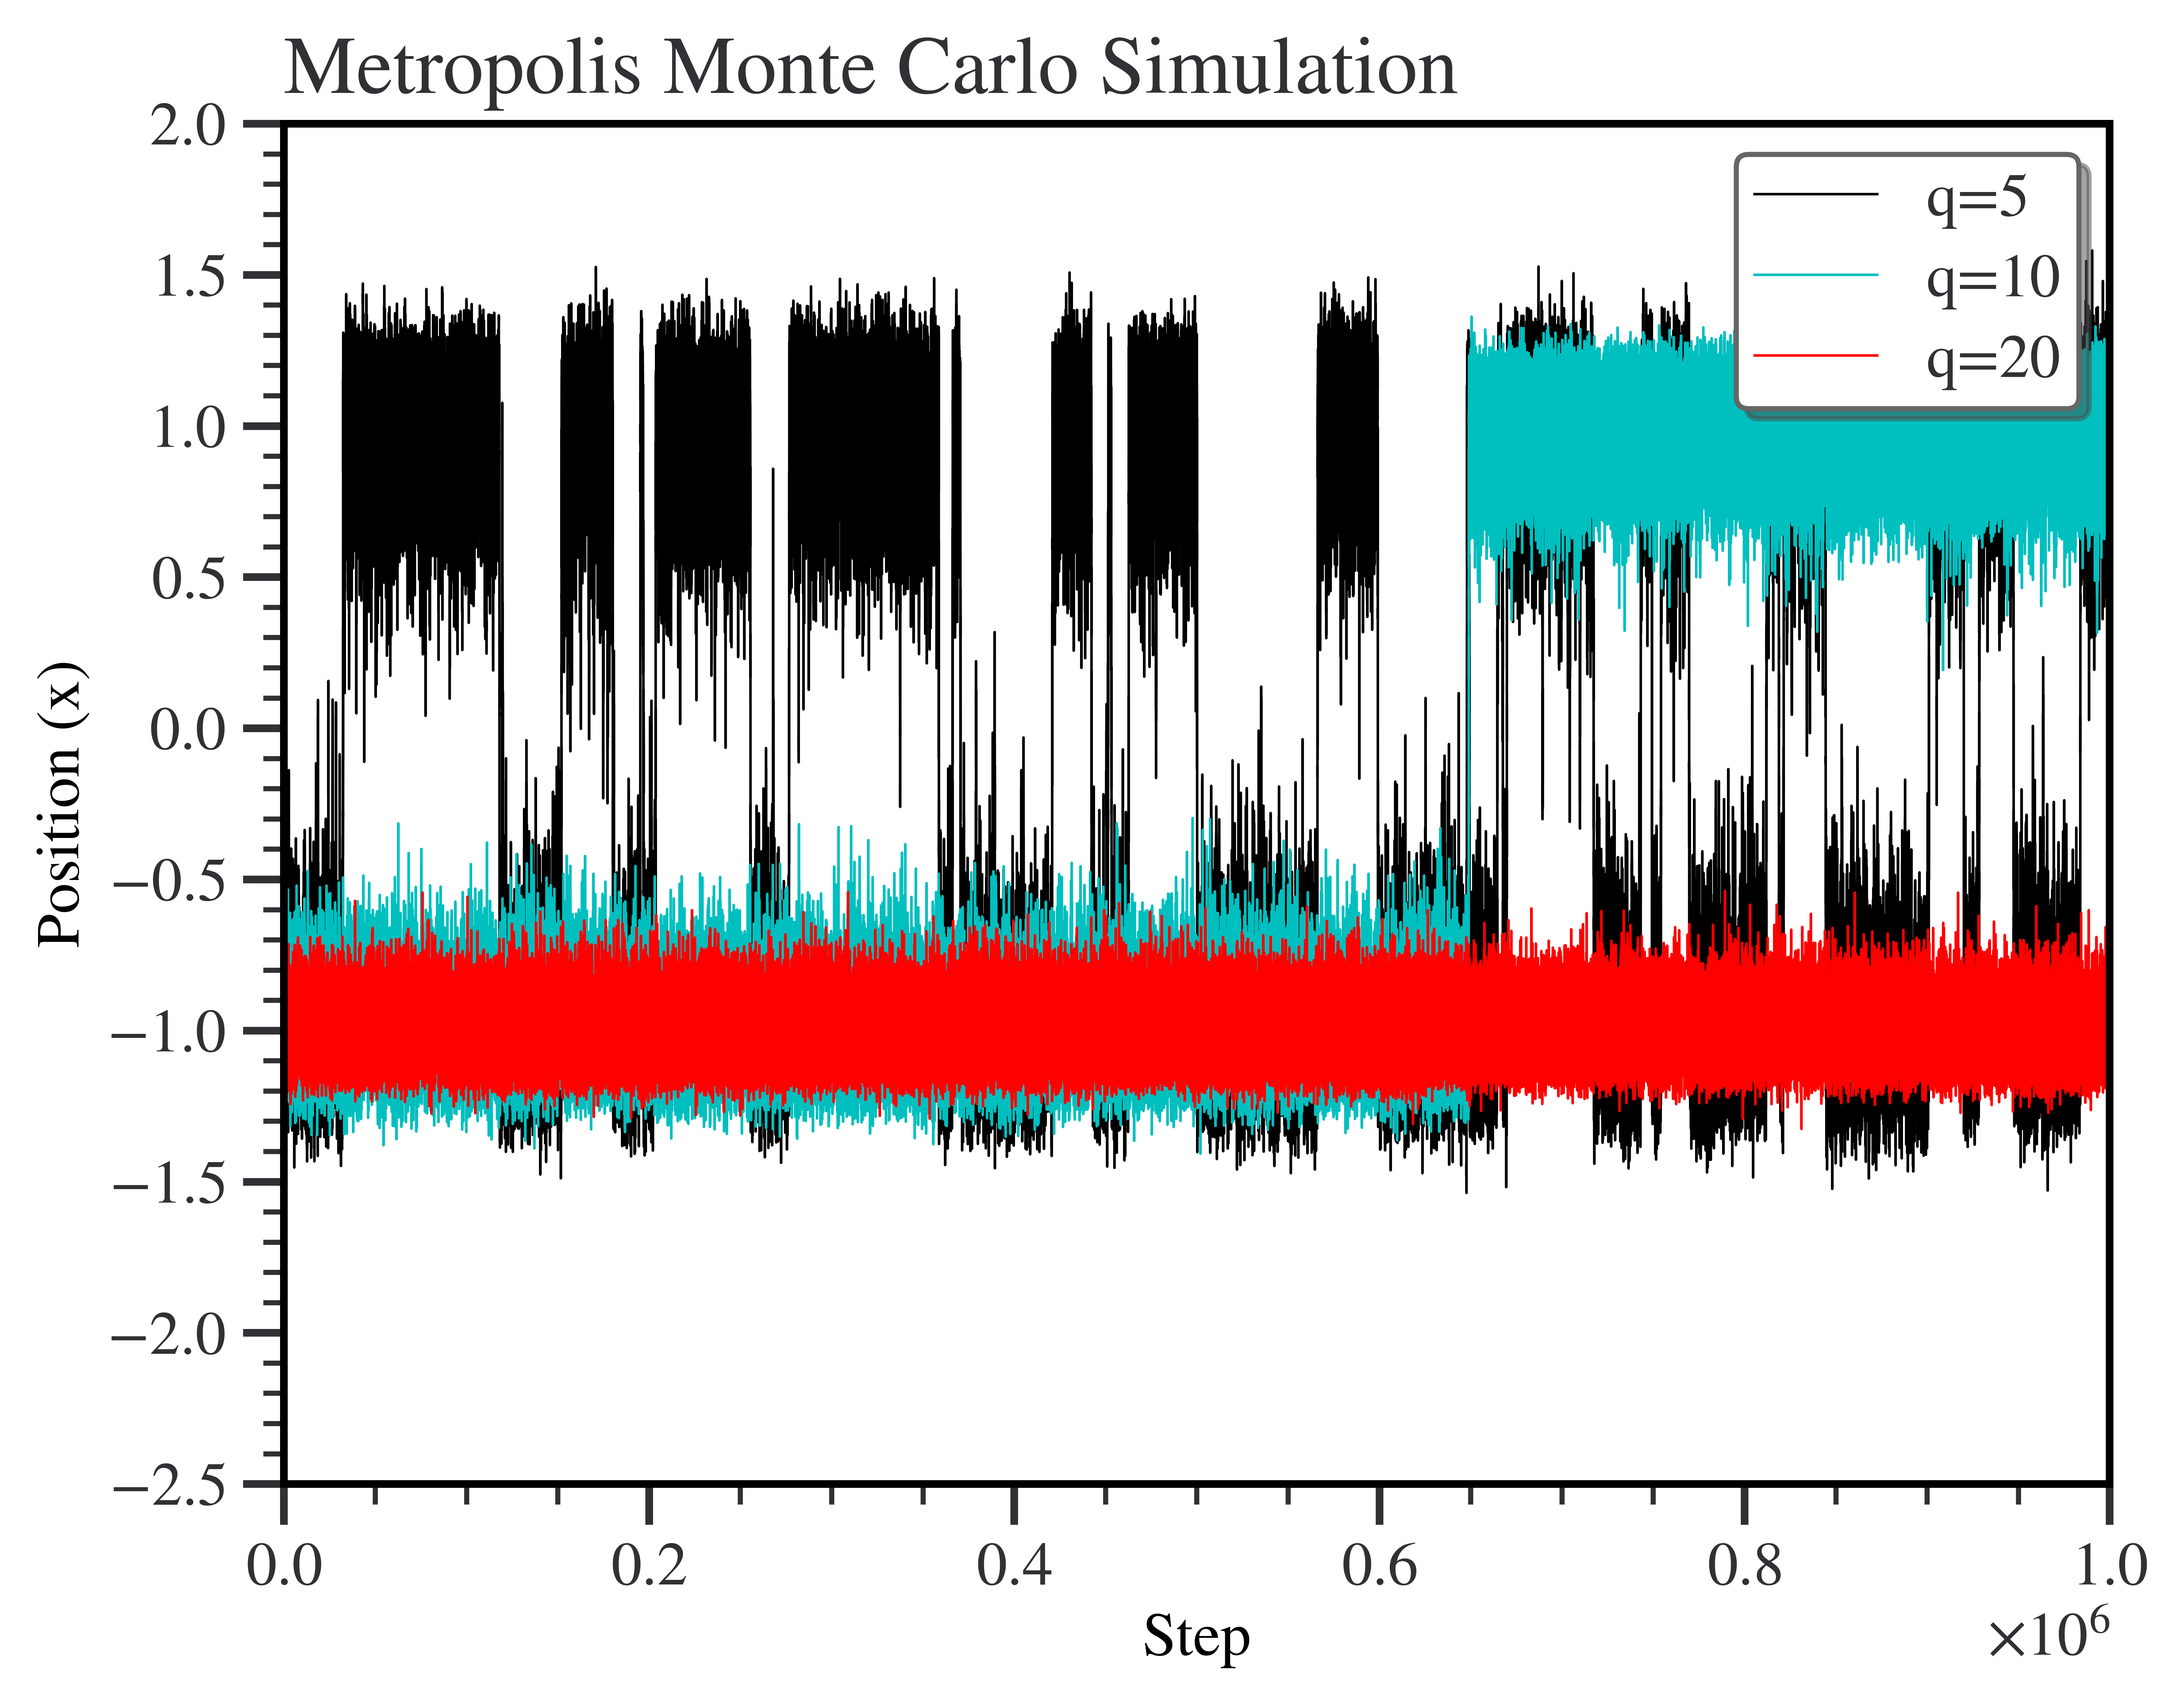

In [59]:
import numpy as np
import matplotlib.pyplot as plt

def energy(q, x,k=0):
    return q * (x**2 - 1)**2 + k*(x**2)

def metropolis(q, x_current, step_size):
    x_proposed = x_current + step_size * np.random.uniform(-1, 1)
    
    delta_energy = energy(q, x_proposed) - energy(q, x_current)
    
    if delta_energy < 0 or np.random.rand() < np.exp(-delta_energy):
        return x_proposed
    else:
        return x_current

def metropolis_simulation(q, num_steps, step_size):
    x_values = [np.random.uniform(-2, 2)]  # Initial random position

    for _ in range(num_steps):
        x_current = x_values[-1]
        x_new = metropolis(q, x_current, step_size)
        x_values.append(x_new)

    return np.array(x_values)

# Parameters
q_value = 5
q_value1 = 10
q_value3 = 20
num_steps = 1000000
step_size = 0.1
plt.xlim(0,1000000)

# Run Metropolis simulation
x_values = metropolis_simulation(q_value, num_steps, step_size)
x1_values = metropolis_simulation(q_value1, num_steps, step_size)
x2_values = metropolis_simulation(q_value3, num_steps, step_size)

# Plot the results
plt.plot(x_values,'k',linewidth=0.5, label='q=5')
plt.plot(x1_values,'c',linewidth=0.5, label='q=10')
plt.plot(x2_values,'r',linewidth=0.5, label='q=20')

plt.title('Metropolis Monte Carlo Simulation')
plt.xlabel('Step')
plt.ylabel('Position (x)')
plt.legend(fancybox=True,borderpad=0.3,shadow=True,loc=1)
plt.show()

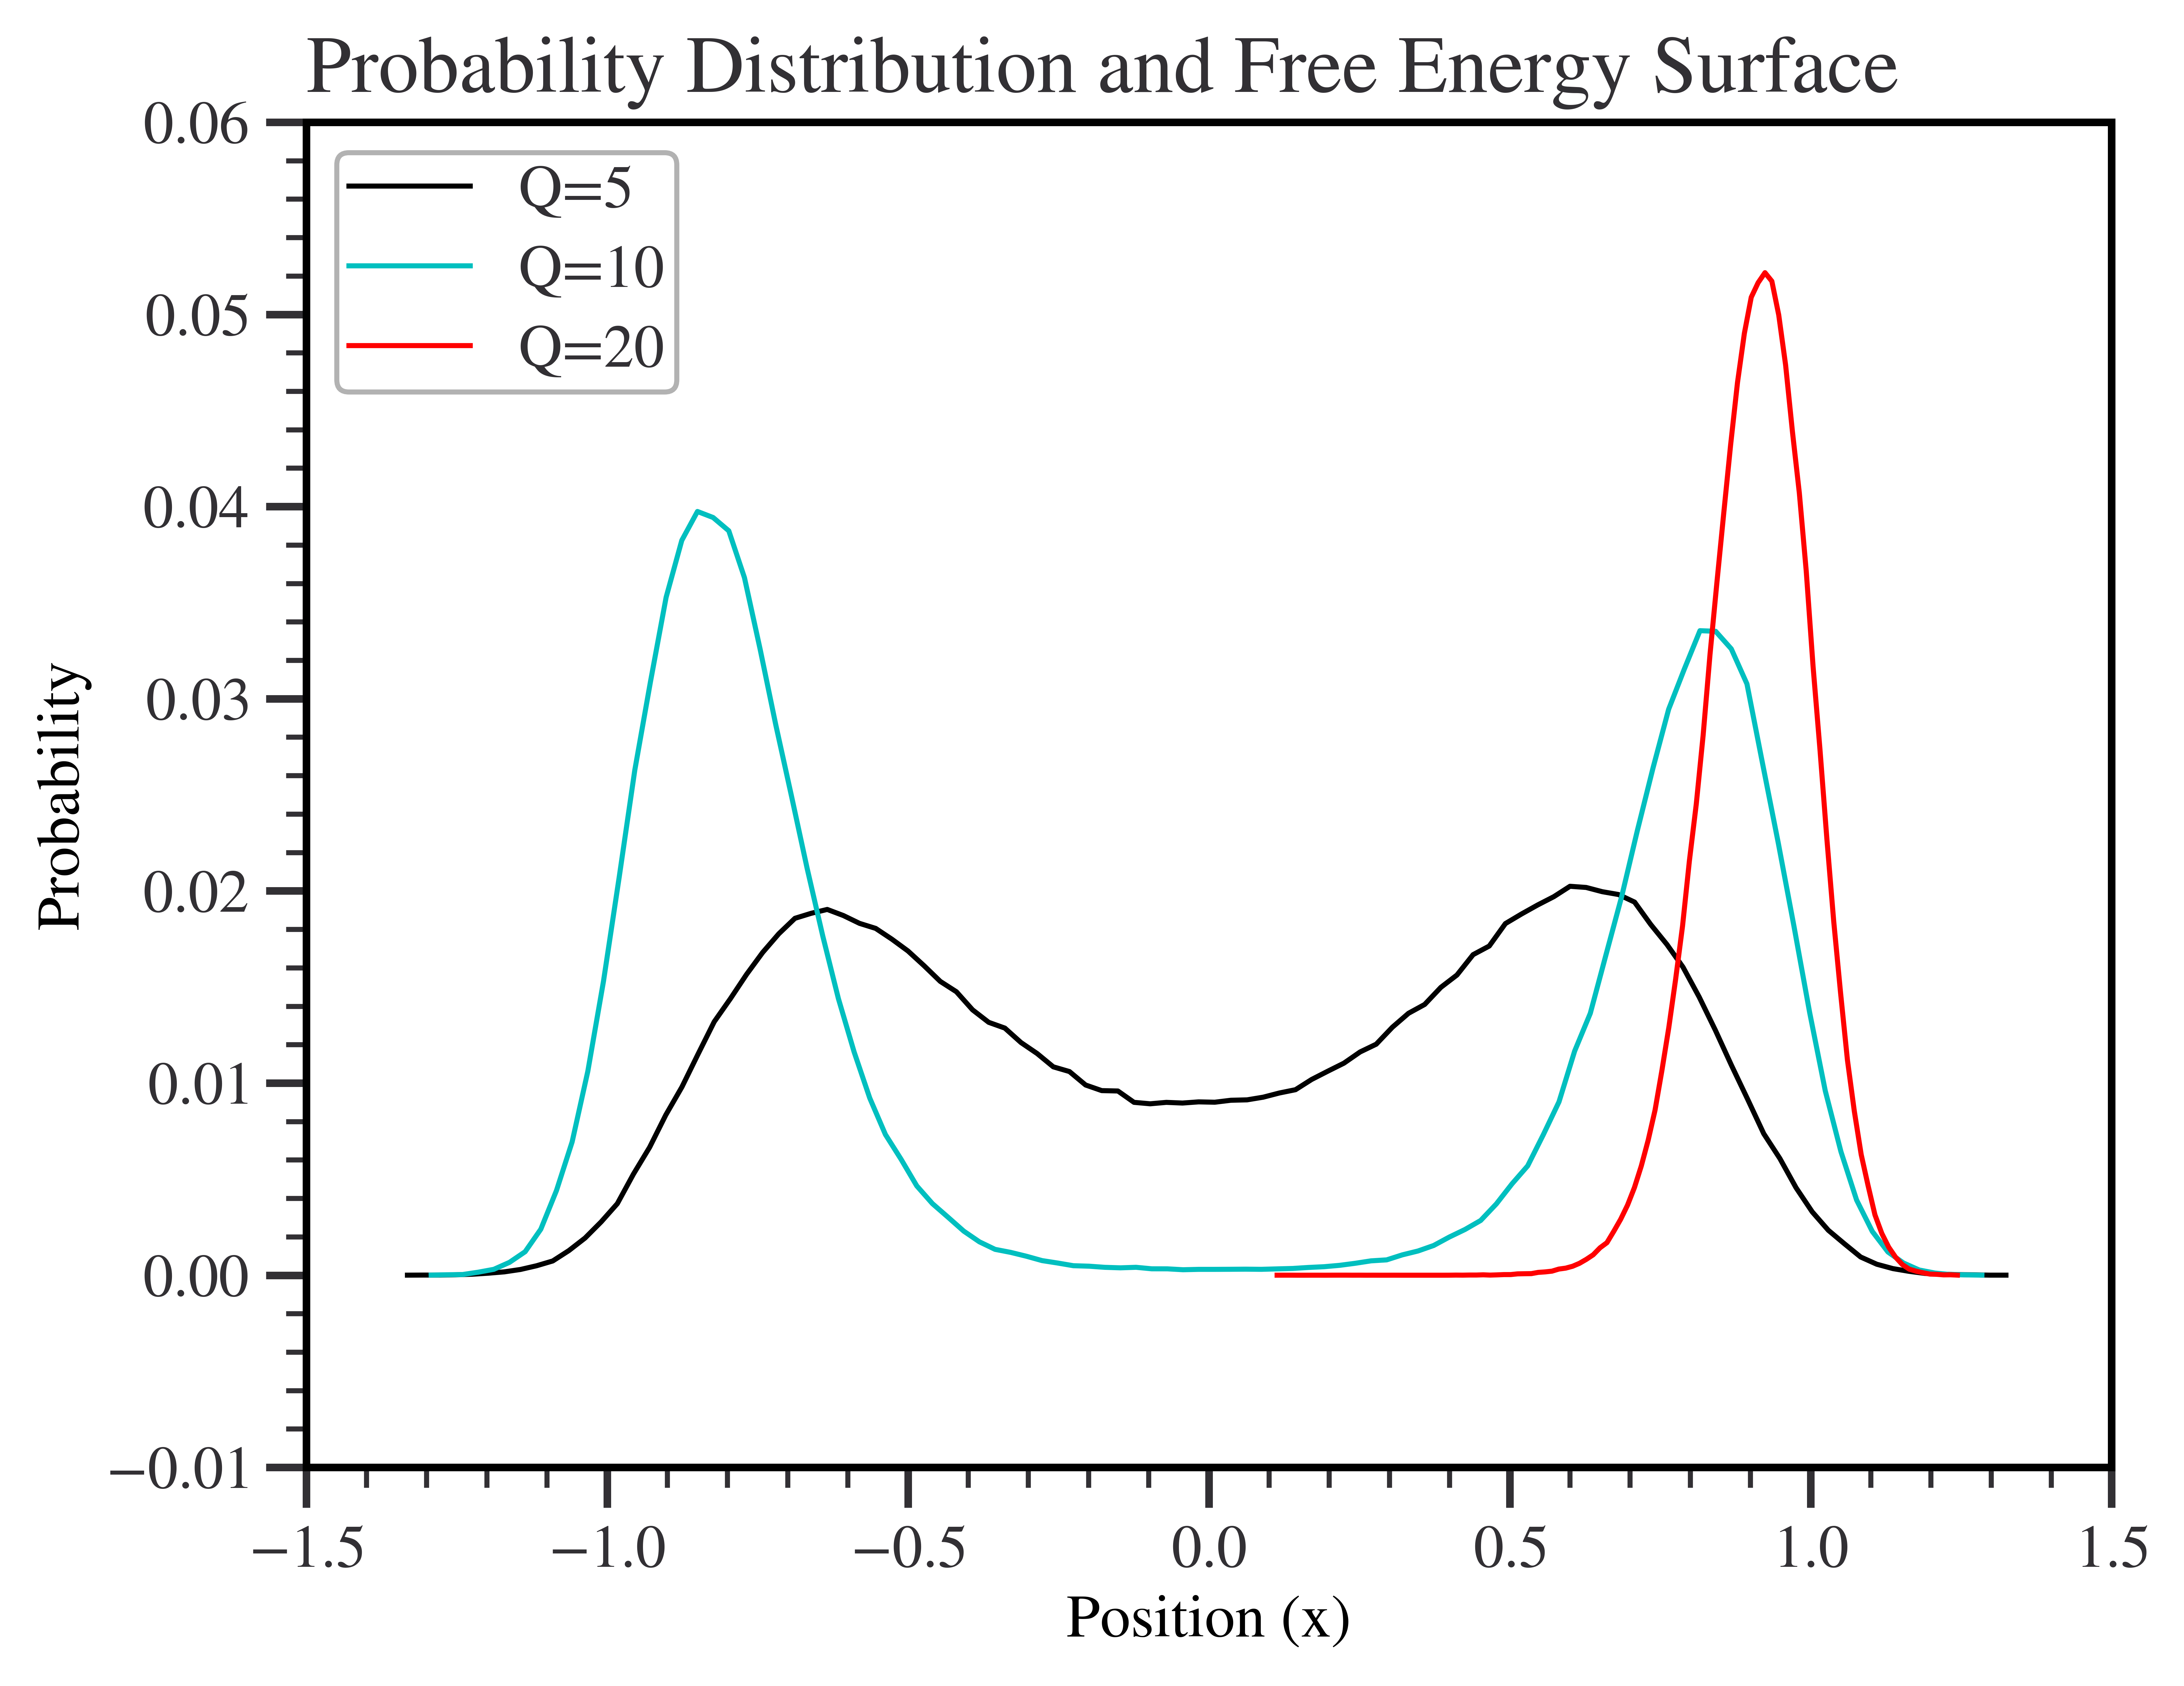

In [58]:
def calculate_probability_distribution(x_values, bins=100):
    hist, bin_edges = np.histogram(x_values, bins=bins, density=True)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    probability_distribution = hist / np.sum(hist)
    return bin_centers, probability_distribution

# Calculate probability distribution
x_bins, probability_distribution = calculate_probability_distribution(x_values)
x_bins1, probability_distribution1 = calculate_probability_distribution(x1_values)
x_bins2, probability_distribution2 = calculate_probability_distribution(x2_values)

# Plot the results
plt.plot(x_bins, probability_distribution,'k', label='Q=5')
plt.plot(x_bins1, probability_distribution1,'c', label='Q=10')
plt.plot(x_bins2, probability_distribution2,'r', label='Q=20')
plt.title('Probability Distribution and Free Energy Surface')
plt.xlabel('Position (x)')
plt.ylabel('Probability')
plt.legend()
plt.show()

In [19]:
f5 = -np.log10(probability_distribution)
min_f5 = np.min(f5)
f5_minzero = f5 - min_f5

f10 = -np.log10(probability_distribution1)
min_f10 = np.min(f10)
f10_minzero = f10 - min_f10

f20 = -np.log10(probability_distribution2)
min_f20 = np.min(f20)
f20_minzero = f20 - min_f20

/tmp/ipykernel_217504/1354515908.py:9: RuntimeWarning: divide by zero encountered in log10
  f20 = -np.log10(probability_distribution2)


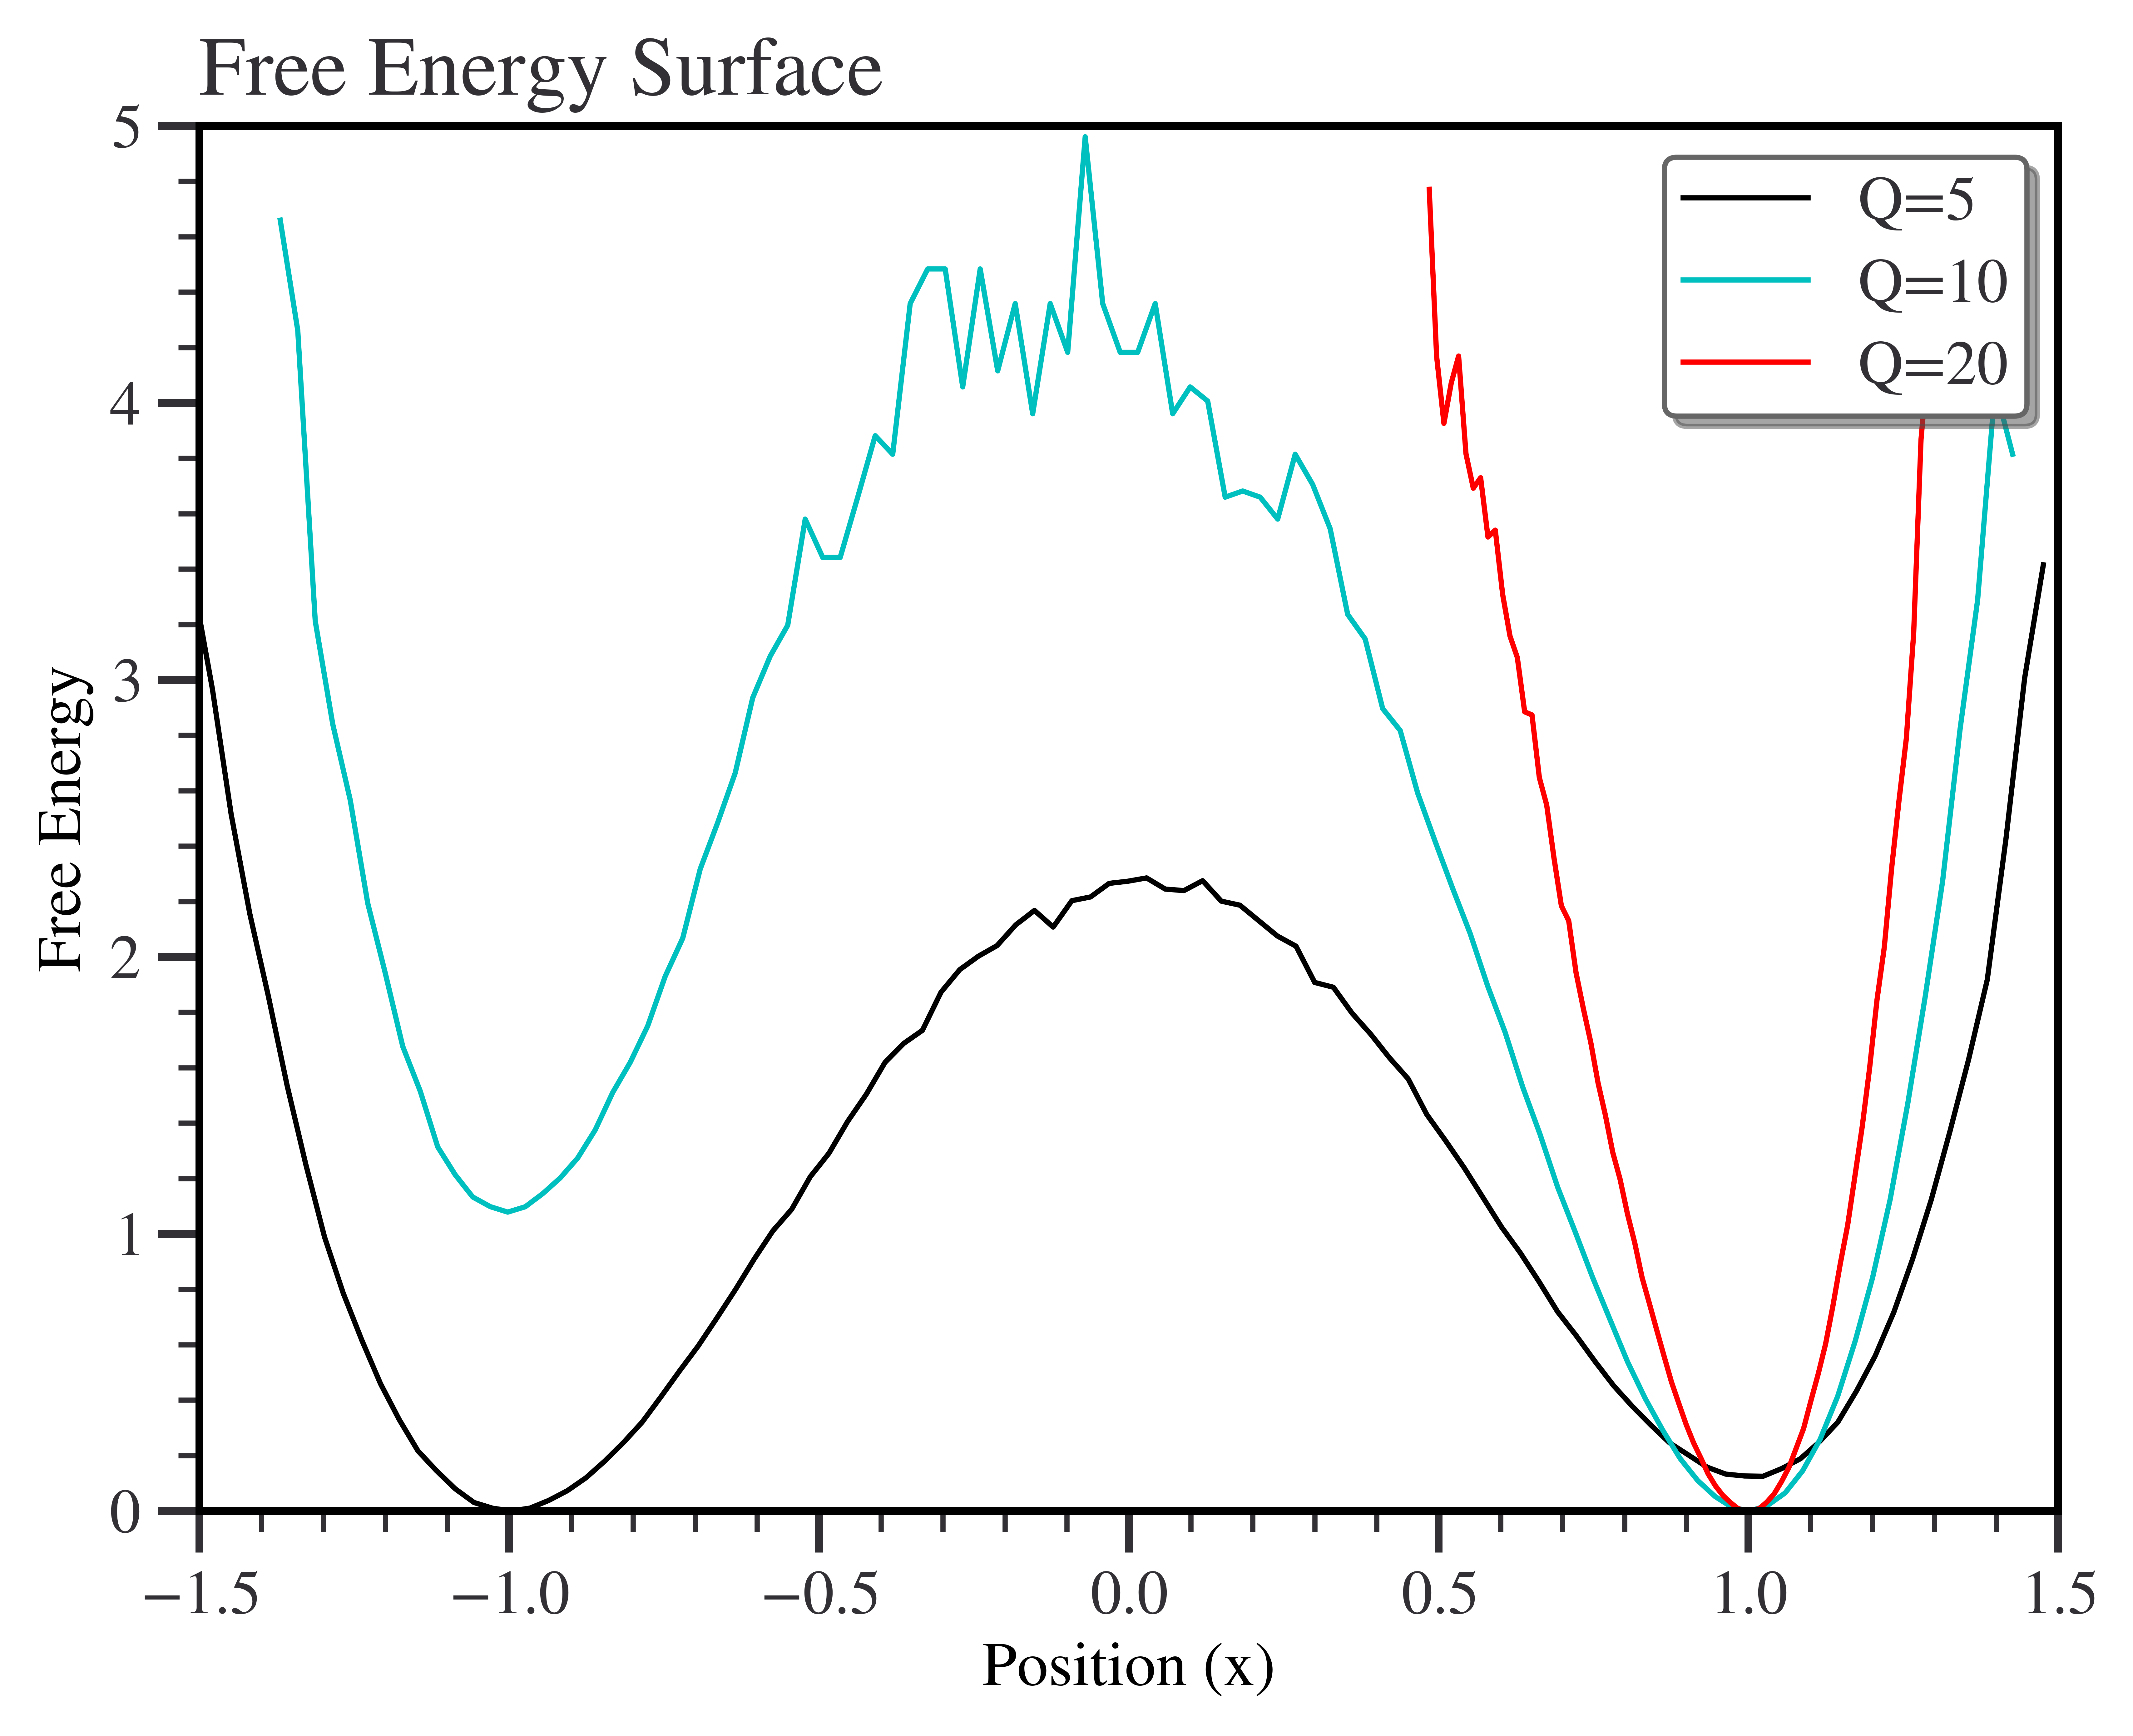

In [20]:
plt.xlim(-1.5,1.5)
plt.ylim(0,5)
plt.title('Free Energy Surface')
plt.plot(x_bins,f5_minzero,'k', label='Q=5')
plt.plot(x_bins1,f10_minzero,'c', label='Q=10')
plt.plot(x_bins2,f20_minzero,'r', label='Q=20')
plt.xlabel('Position (x)')
plt.ylabel('Free Energy')
plt.legend(fancybox=True,borderpad=0.3,shadow=True,loc=1)

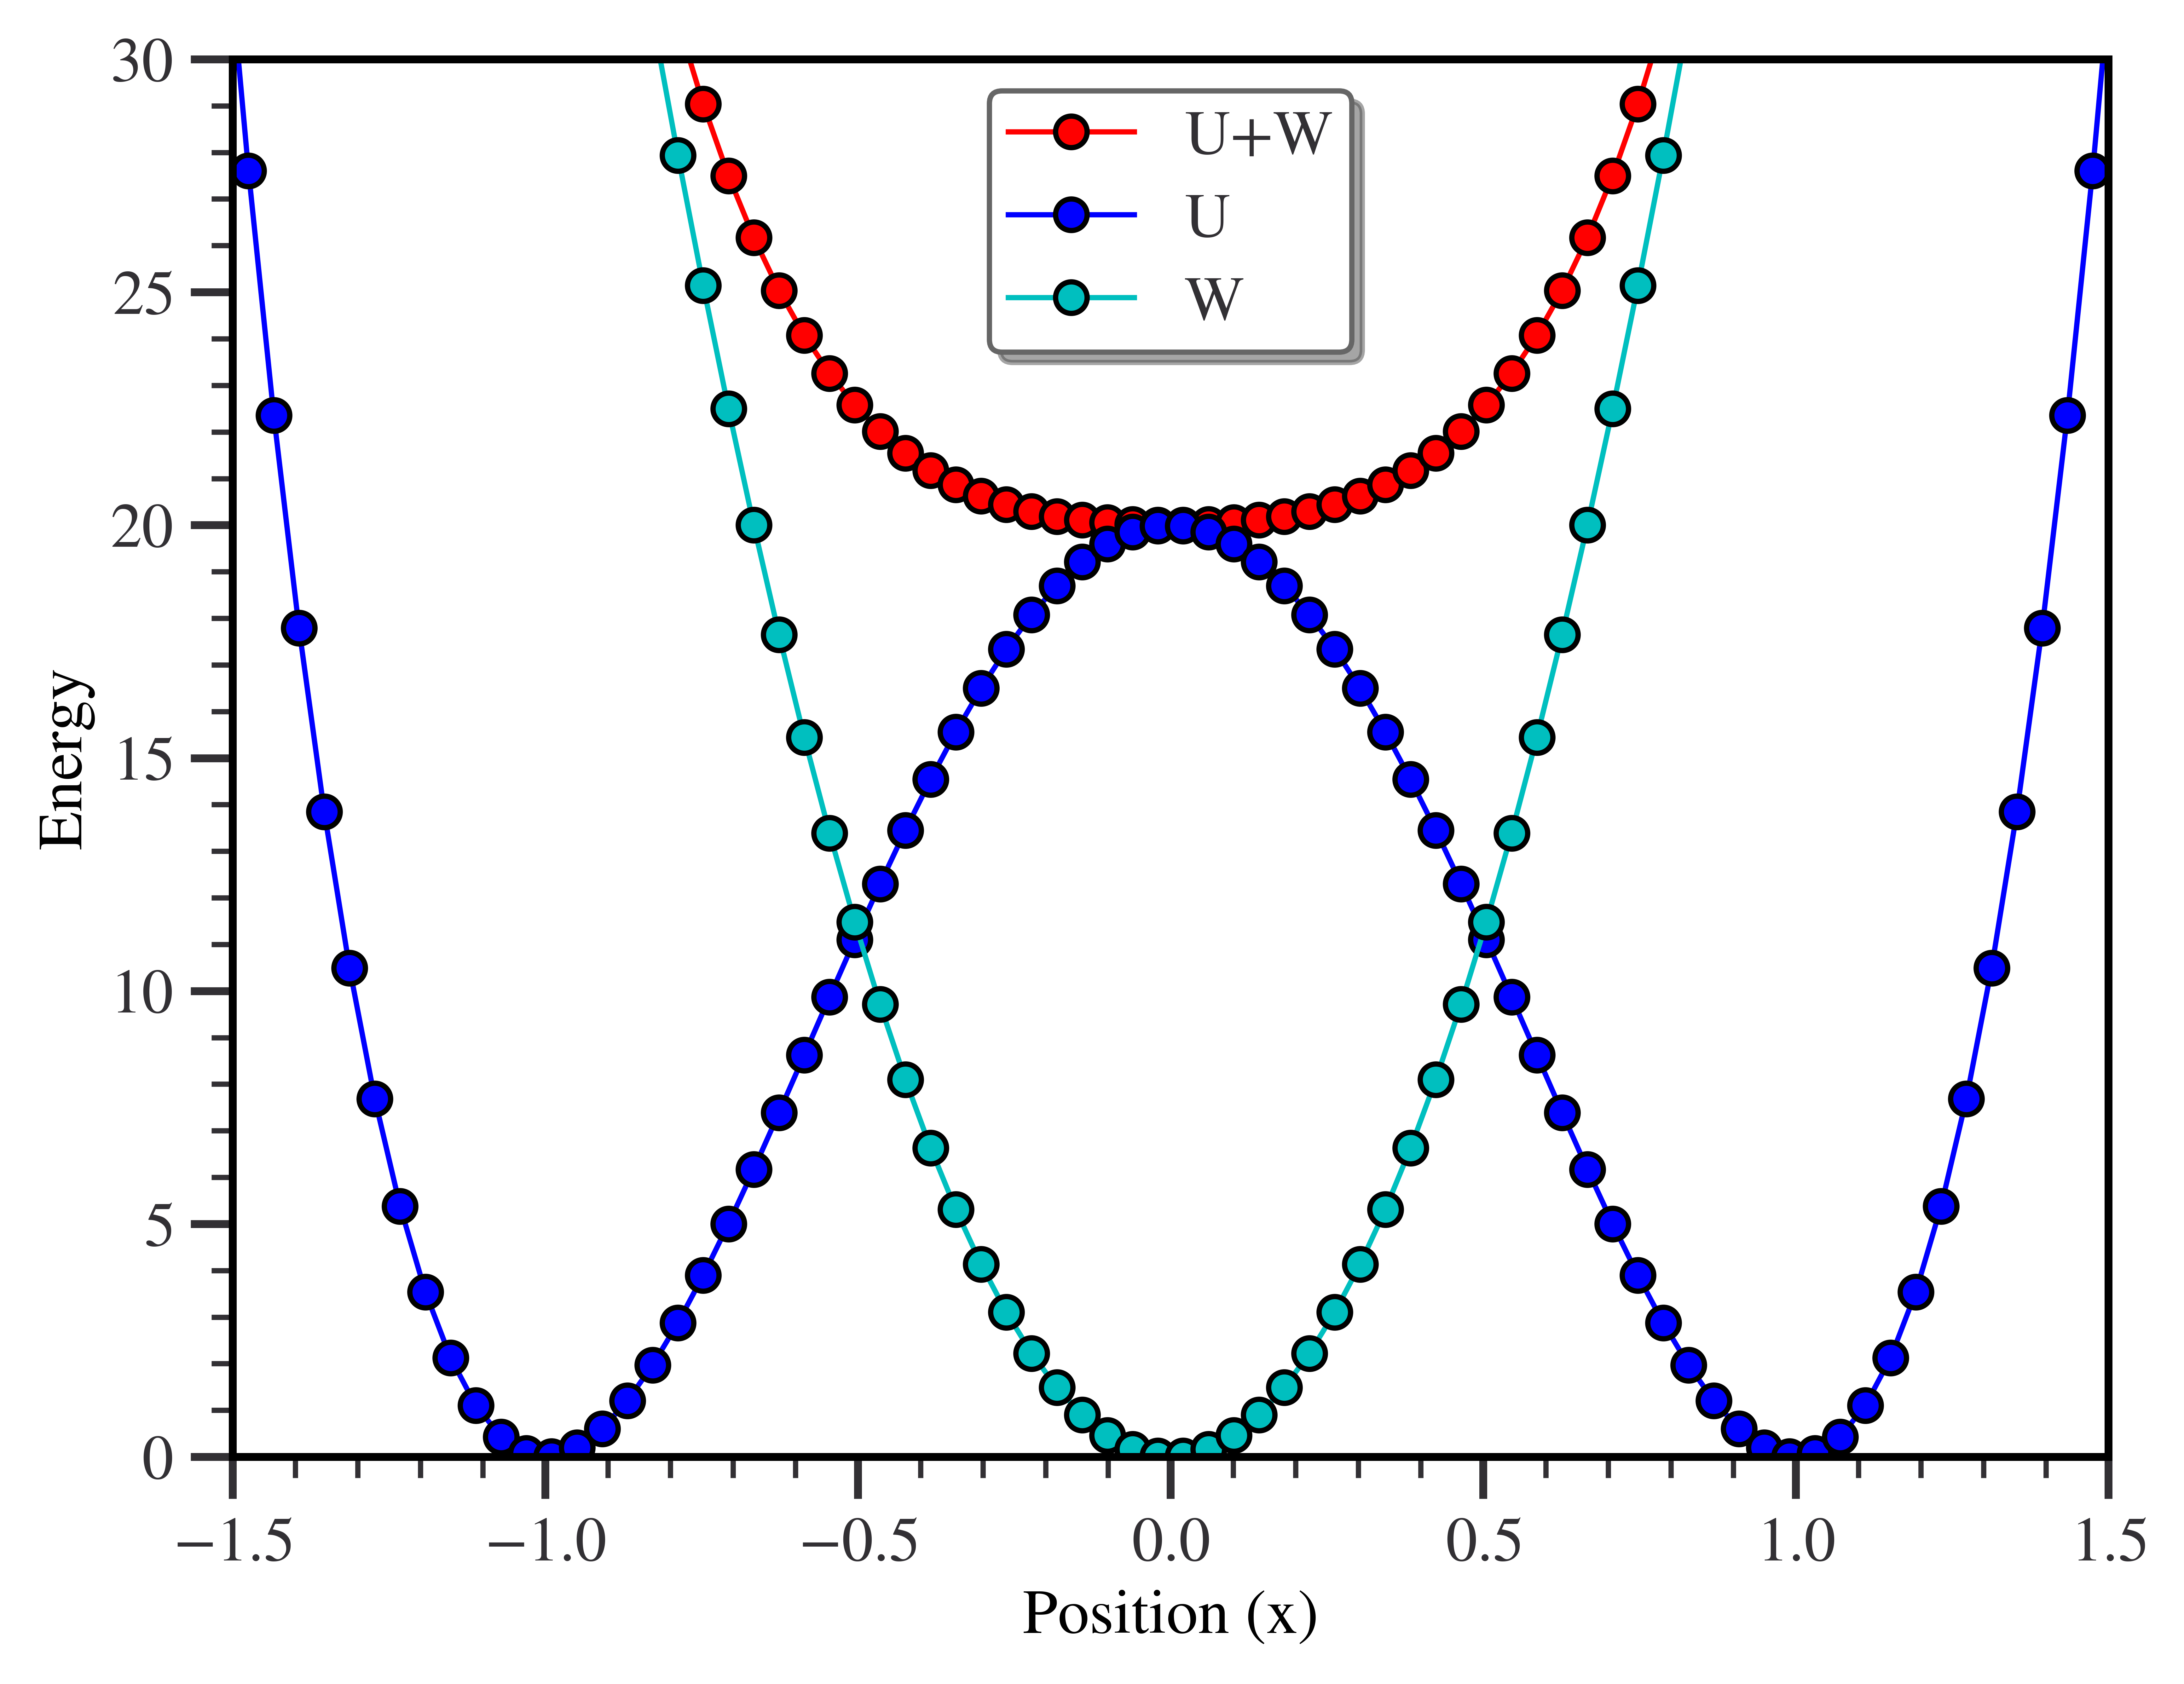

In [47]:
plt.style.use('./style.txt')
x = np.linspace(-2, 2, 100)
q=20
x0= 0
k=90.0
plt.plot(x,total_energy(q, x, k, x0),'ro-',linewidth=1.0,label='U+W')
plt.plot(x,q * (x**2 - 1)**2,'bo-',linewidth=1.0,label='U')
plt.plot(x,bias_potential(k, x, x0),'co-',linewidth=1.0,label='W')
plt.xlabel('Position (x)')
plt.ylabel('Energy')
plt.ylim(0,30)
plt.xlim(-1.5,1.5)
plt.legend(fancybox=True,borderpad=0.3,shadow=True,loc=9)